# Eric Yarger
# D213 Task 2
# Sentiment Analysis 

In [1]:
# D213_Task2 Environment

In [2]:
# Import necessary modules

import numpy as np 
import pandas as pd
import os
import re
import string
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter enviornment varsion
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [4]:
# Python Version
import platform
print(platform.python_version())

3.7.13


In [5]:
# Read in data
df = pd.read_csv('C:/Users/ericy/Desktop/sentiment_labelled_merged_id.csv')

In [6]:
# Initial informational overview

df

,Id,Review,Score
0,1,"A very, very, very slow-moving, aimless movie ...",0
1,2,Not sure who was more lost - the flat characte...,0
2,3,Attempting artiness with black & white and cle...,0
3,4,Very little music or anything to speak of.,0
4,5,The best scene in the movie was when Gerardo i...,1
...,...,...,...
2995,2996,The screen does get smudged easily because it ...,0
2996,2997,What a piece of junk.. I lose more calls on th...,0
2997,2998,Item Does Not Match Picture.,0
2998,2999,The only thing that disappoint me is the infra...,0


In [7]:
# Check value length for 'Review'

number_of_values = len((df['Review']))
print(number_of_values)

3000


# Presence of Unusual Characters

In [8]:
# List characters in reviews
# Code Reference (Elleh, 2022)

characters = df['Review']
list_chars = []
for char in characters:
    for chars in char:
        if chars not in list_chars:
            list_chars.append(chars)
print(list_chars)

['A', ' ', 'v', 'e', 'r', 'y', ',', 's', 'l', 'o', 'w', '-', 'm', 'i', 'n', 'g', 'a', 'b', 'u', 't', 'd', 'f', '.', 'N', 'h', 'c', 'k', 'p', '&', 'x', 'V', 'T', 'G', 'I', "'", 'W', 'S', 'L', 'J', 'B', 'F', 'M', 'H', 'C', '"', '\x96', 'z', '?', 'q', 'Y', 'j', 'P', 'U', 'R', 'E', '1', '3', ';', '/', 'O', '2', '9', '0', ':', '*', 'D', 'Q', 'é', '(', ')', '!', 'K', '$', '7', '5', 'Z', '\x85', '8', '+', '%', '4', 'å', '6', '\x97', 'X', 'ê', '#', '[', ']']


# Data Exploration & Cleaning

# Stopwords

In [9]:
# Use stopwords to identify useful words

def df_clean(df_unclean):
    df_unclean = df_unclean.translate(str.maketrans('', '', string.punctuation + string.digits))
    df_words = df_unclean.lower().split()
    stop_words = set(stopwords.words("english"))
    req_words = [w for w in df_words if not w in stop_words]
    return( " ".join(req_words))

df['Review']= df['Review'].apply(df_clean)

In [10]:
print(df['Review'])

0       slowmoving aimless movie distressed drifting y...
1       sure lost flat characters audience nearly half...
2       attempting artiness black white clever camera ...
3                             little music anything speak
4       best scene movie gerardo trying find song keep...
                              ...                        
2995           screen get smudged easily touches ear face
2996                          piece junk lose calls phone
2997                                   item match picture
2998                 thing disappoint infra red port irda
2999                       answer calls unit never worked
Name: Review, Length: 3000, dtype: object


# WordCloud

In [11]:
# stopwords set for wordcloud

stopwords = set(STOPWORDS)

In [12]:
# Function to create wordcloud
# Using WordCloud

def word_cloud(data, title = 'Dataset WordCloud'):
    
    wordcloud = WordCloud(stopwords= stopwords,max_words =120,max_font_size=30, scale=5).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12)) # WordCloud Size  
    plt.axis('off')                       # Remove plot axis for cleaner image generation
    plt.imshow(wordcloud)                 # Display data as 2d image
    plt.show()                            # Generate Plot

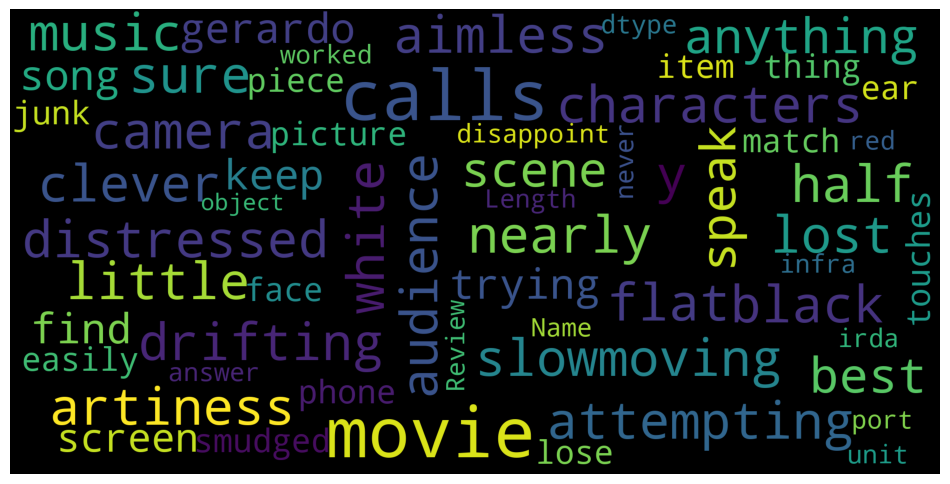

In [13]:
# Generate wordcloud from wordcloud function

word_cloud(df["Review"])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Identify number of values for 'Review'

number_of_values = len(set(df['Review']))

In [16]:
# Print number of values for 'Review'

print(number_of_values)

2927


In [17]:
# Import full tensorflow module

import tensorflow as tf

# Import necessary keras modules for Tokenizer,
# padding, Layers, Model, and Initializer

from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints
from tensorflow.keras import optimizers
from tensorflow.keras import layers


# LSTM, Models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional 
from tensorflow.keras.layers import GlobalMaxPool1D 
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential

#Tokenizer and Padding modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ericy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
# Code reference (Elleh, 2022)

characters = df['Review']
list_chars = []
for char in characters:
    for chars in char:
        if chars not in list_chars:
            list_chars.append(chars)
print(list_chars)

['s', 'l', 'o', 'w', 'm', 'v', 'i', 'n', 'g', ' ', 'a', 'e', 'd', 't', 'r', 'f', 'y', 'u', 'c', 'h', 'k', 'p', 'b', 'x', 'j', '\x96', 'z', 'q', 'é', 'å', '\x97', 'ê']


# Vocabulary Size

In [19]:
# Tokenizer, Vocab Size, Special char filter, # Seq. Length
# Code Reference (Ellah, 2022)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
print('Vocabulary size ', len(tokenizer.word_index) +1)

Vocabulary size  5171


# Filter Special Characters

In [20]:
keras_token = Tokenizer(filters='\t\n})~!|#*=&<>;:+.{/,(?$^_-%@)[\\]', oov_token = '[UNK]', lower = True)

# Vocabulary size, alternative check

In [21]:
keras_token.fit_on_texts(characters)

In [22]:
# Check vocabulary size after special character removal

word_count = keras_token.word_index 
print('Size of our Vocab in dataset:', len(word_count))

Size of our Vocab in dataset: 5171


# Determine Max Length of sequences

In [23]:
characters_length = []
for char_len in characters:
    characters_length.append(len(char_len.split(' ')))

In [24]:
characters_max = np.max(characters_length)
characters_min = np.min(characters_length)
characters_median = np.median(characters_length)

In [25]:
print('Max length of sequence is:', characters_max)
print('Min length of sequence is:', characters_min)
print('Median length of sequence is:', characters_median)

Max length of sequence is: 36
Min length of sequence is: 1
Median length of sequence is: 5.0


# Train/Test/Validation Split 64/20/16 Split

In [26]:
df_train = df[:1920]
val_train=df[1921:2400]
df_test = df[2401:]
print(df_train.shape)
print(val_train.shape)
print(df_test.shape)

(1920, 3)
(479, 3)
(599, 3)


# Variable Assignment

In [27]:
# Assign Score values to training variable

y = df_train['Score'].values

In [28]:
# Assign Train and Test reviews from Train and Test Sets
# Training assignment
training_review = df_train['Review']

#Testing assignment
testing_review = df_test['Review']

In [29]:
# Check review shape and composition after assignment
# Looking to ensure special character removal, stopword removal
# Over small sample

print(training_review[80:125])

80     im glad pretentious piece didnt planned dodge ...
81                           first movie ive given years
82                 ever movie needed wordofmouth promote
83             overall film interesting thoughtprovoking
84       plus wellpaced suited relatively short run time
85                                         give one look
86                                                  gave
87                 wind lion well written superbly acted
88                                          true classic
89     actually turned pretty decent far blist horror...
90                             definitely worth checking
91                                        problem script
92                                            horrendous
93                                    nothing believable
94           suspense feeling frustration retarded girls
95     manna heaven terrific film predictable unpredi...
96     scenes often funny occasionally touching chara...
97                    cast vete

# Tokenization

In [30]:
# Set max number of features from counting number of unique review values from above
max_number_features = 5171

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=max_number_features, filters='\t\n})~!|#*=&<>;:+.{/,(?$^_-%@)[\\]', oov_token = '[UNK]', lower = True)

# Fit tokenizer on text for training review
tokenizer.fit_on_texts(list(training_review))

train_tokenized = tokenizer.texts_to_sequences(training_review)
test_tokenized = tokenizer.texts_to_sequences(testing_review)

In [31]:
# Print small sample of Tokenized elements

print(train_tokenized[0:100])

[[1603, 1604, 2, 1605, 1606, 521, 126], [209, 522, 523, 28, 424, 970, 266, 425], [1607, 1608, 179, 180, 426, 267, 971, 2, 70, 972, 15, 427, 25, 157, 46, 303, 181, 1609], [50, 108, 268, 673], [17, 127, 2, 1610, 354, 146, 524, 973, 355, 674], [428, 2, 356, 182, 974, 675, 1611, 357, 269, 429], [304, 85, 358], [158, 2, 305, 116, 4, 975, 4, 1612, 183], [210, 211], [86, 359, 976, 184, 1613, 1614], [676, 1615, 677], [2, 525, 117, 1616, 17, 23, 65, 678], [430, 17, 1617, 360], [212], [77, 679, 2, 680, 51, 181, 77, 431], [432, 25, 526, 681, 433, 434, 977, 26], [435, 159, 1618, 147, 436, 527, 85, 978, 306, 528, 3, 16, 23], [185, 361, 529, 2, 979, 1619, 270, 25, 1620, 307, 236, 980, 981], [1621, 109, 437, 530, 982, 682, 683, 983], [1622, 3, 438, 1623, 984, 362, 271], [32, 3, 308, 1624, 684, 1625, 41, 531], [532, 1626, 439, 3, 78, 438, 1627, 1628, 47], [99, 77, 363, 440, 268, 2], [100, 186, 1629, 1630, 985, 271, 986], [685, 3, 1631, 237, 686, 309, 1632, 987, 988, 272, 989, 128, 533], [160, 3, 238, 

# Padding

In [32]:
# Pad Sequences
# Padding max_length chosen from finding max_length of review sequence from above


max_length = 36
X_train = pad_sequences(train_tokenized, maxlen=max_length)
X_test = pad_sequences(test_tokenized, maxlen=max_length)



In [33]:
# Print Sample of prepared, padded, tokenized review

print(X_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 209 522 523  28 424 970 266 425]


In [34]:
X_test.shape

(599, 36)

In [35]:
# Print Sample of prepared, padded, tokenized review

print(X_train[10])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  676 1615  677]


In [36]:
# Print Sample of prepared, padded, tokenized review

print(X_train[100])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 20 32 70]


In [37]:
# Print Sample of prepared, padded, tokenized review

print(X_train[1000])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 619  86   8]


# B6 Prepared Dataset

In [69]:
prepared_dataset = pd.DataFrame(X_train)
prepared_dataset.shape

(1920, 36)

In [67]:
#!pip install openpyxl
import openpyxl

In [68]:
# Read out training set
prepared_dataset.to_excel('C:/Users/ericy/Desktop/D213T2_prepared_training_dataset.xlsx')


# Model Creation
# Model Criteria
# Model Execution

# Fitting activation function, 
# Stopping criteria: TF Keras EarlyStopping utilized.  
## monitoring 'val_accuracy', patience set to 3, verbosity is turned on

In [41]:
from tensorflow.keras.callbacks import EarlyStopping as EarlyStopping

In [42]:
# Keras EarlyStopping
# Code Reference (Keras documentation: EarlyStopping, n.d.)

callback = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)

In [43]:
# Function for initializing NLP LTSM model
# Sets data, epoch size, steps, and validation split
# Code Reference (PSS, 2021)

def initialize_model(model, model_name, number_epochs, batchsize, X_data, y_data, val_train):    
    checkpoint_path = model_name+"_cp-{epoch:04d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
    model_hist = model.fit(
        X_data,
        y_data,
        steps_per_epoch=batchsize,
        epochs=number_epochs,
        validation_split=val_train,
        callbacks=[callback]
    )
    return model_hist


In [44]:
# Function 'chart' assignment for plotting model results
# Code Reference (PSS, 2021)

def chart(model_hist):
    plt.plot(model_hist.history['accuracy'], 'b')
    plt.plot(model_hist.history['val_accuracy'], 'r')
    plt.plot(model_hist.history['loss'], 'g')
    plt.plot(model_hist.history['val_loss'], 'y')
    plt.title('Accuracy of the Model'),
    plt.xlabel('Epoch Count')
    plt.ylabel('Measurement of Accuracy')
    plt.legend(['Training Set', 'Validation Set', 'Loss', 'Validation Loss'], loc='lower left')
    plt.show()



In [45]:
# Setting up Parameters for first Model
# Code Reference (PSS, 2021)

class LSTM1():
    def __new__(self):
        inp = Input(shape=(max_length, ))
        embed_size = 128
        x = Embedding(max_number_features, embed_size)(inp)
        x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
        x = GlobalMaxPool1D()(x)
        x = Dropout(0.1)(x)
        x = Dense(50, activation="sigmoid")(x)
        x = Dropout(0.1)(x)
        x = Dense(1, activation="sigmoid")(x)
        first_model = Model(inputs=inp, outputs=x)
        first_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
        
        return first_model

lstm1 = LSTM1()



In [46]:
# Print First Model Summary

print(lstm1.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding (Embedding)       (None, 36, 128)           661888    
                                                                 
 lstm_layer (LSTM)           (None, 36, 60)            45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

In [47]:
# Initialize First Model

lstm1 = LSTM1()
history_lstm1 = initialize_model(lstm1, "lstm1", 10, 64, X_train, y, 0.2)



Epoch 1/10
64/64 [==============================] - 5s 30ms/step - loss: 0.6977 - accuracy: 0.5098 - val_loss: 0.6933 - val_accuracy: 0.5078
Epoch 2/10
64/64 [==============================] - 1s 16ms/step - loss: 0.7004 - accuracy: 0.4954 - val_loss: 0.6939 - val_accuracy: 0.5078
Epoch 3/10
64/64 [==============================] - 1s 16ms/step - loss: 0.6974 - accuracy: 0.5111 - val_loss: 0.6942 - val_accuracy: 0.5078
Epoch 4/10
64/64 [==============================] - 1s 16ms/step - loss: 0.6971 - accuracy: 0.5247 - val_loss: 0.6934 - val_accuracy: 0.5078
Epoch 4: early stopping


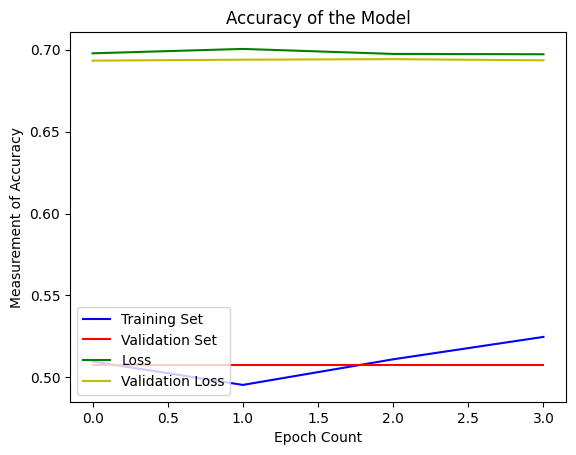

In [48]:
chart(history_lstm1)

In [70]:
# Set up Second Model
# Code Reference (PSS, 2021)

class LSTM2():
    def __new__(self):
        inp = Input(shape=(max_length, ))
        x = Embedding(5171, 128)(inp)
        x = LSTM(128, activation='sigmoid')(x)
        x = Dense(1, activation='sigmoid')(x)
        second_model = Model(inputs=inp, outputs=x)
        second_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

        return second_model
    
lstm2 = LSTM2()



In [71]:
# Print Second Model Summary

print(lstm2.summary())



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 36, 128)           661888    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 793,601
Trainable params: 793,601
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
# Initialize and run Second Model

lstm2 = LSTM2()
history_lstm2 = initialize_model(lstm2, "lstm2", 10, 128, X_train, y, 0.2)



Epoch 1/10
128/128 [==============================] - 5s 31ms/step - loss: 0.6946 - accuracy: 0.5326 - val_loss: 0.6678 - val_accuracy: 0.5807
Epoch 2/10
128/128 [==============================] - 4s 28ms/step - loss: 0.4869 - accuracy: 0.8314 - val_loss: 0.5433 - val_accuracy: 0.7344
Epoch 3/10
128/128 [==============================] - 4s 28ms/step - loss: 0.1859 - accuracy: 0.9316 - val_loss: 0.6549 - val_accuracy: 0.7109
Epoch 4/10
128/128 [==============================] - 4s 31ms/step - loss: 0.0955 - accuracy: 0.9701 - val_loss: 0.7240 - val_accuracy: 0.7005
Epoch 5/10
128/128 [==============================] - 4s 33ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.8617 - val_accuracy: 0.7005
Epoch 5: early stopping


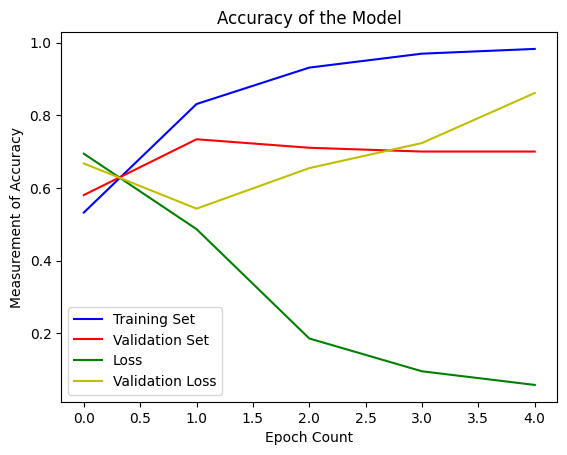

In [73]:
# Print Second Model Summary

chart(history_lstm2)



In [53]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# Section E: Save the Model
### Load the Model and make sure it is functional

In [54]:
lstm2.save("second_model")

INFO:tensorflow:Assets written to: second_model\assets


In [55]:
from keras.models import load_model
reconstructed_model = load_model("second_model")


In [56]:
saved_model = initialize_model(reconstructed_model, "reconstructed_model", 10, 128, X_train, y, 0.2)

Epoch 1/10
128/128 [==============================] - 5s 32ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 1.1811 - val_accuracy: 0.6953
Epoch 2/10
128/128 [==============================] - 4s 30ms/step - loss: 0.0162 - accuracy: 0.9928 - val_loss: 1.2705 - val_accuracy: 0.6901
Epoch 3/10
128/128 [==============================] - 4s 29ms/step - loss: 0.0160 - accuracy: 0.9941 - val_loss: 1.3411 - val_accuracy: 0.7031
Epoch 4/10
128/128 [==============================] - 4s 33ms/step - loss: 0.0105 - accuracy: 0.9974 - val_loss: 1.4156 - val_accuracy: 0.7083
Epoch 5/10
128/128 [==============================] - 4s 32ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 1.7563 - val_accuracy: 0.6719
Epoch 6/10
128/128 [==============================] - 4s 30ms/step - loss: 0.0198 - accuracy: 0.9928 - val_loss: 1.4939 - val_accuracy: 0.7031
Epoch 7/10
128/128 [==============================] - 4s 31ms/step - loss: 0.0076 - accuracy: 0.9961 - val_loss: 1.5854 - val_accuracy: 0.7109

In [57]:
# Assign Test Label values for scores from test data
# Test Data is defined at split from earlier as X_test

Y_test = df_test['Score'].values


# D4: Predictive Accuracy

In [58]:
# Using Keras Model Evaluation to 
# test accuracy on Test data and test labels
# Code Reference (Keras - Model evaluation and model prediction, n.d.)

# initiate keras model.evaluate
# assign Test data and Test Labels
score = lstm2.evaluate(X_test, Y_test, verbose = 1) 

# Print Test Accuracy 
print('Test accuracy:', score[1])

19/19 [==============================] - 1s 15ms/step - loss: 1.2005 - accuracy: 0.6761
Test accuracy: 0.6761268973350525


# Model Predictions

## Confusion Matrix and F-Score Calculation

In [63]:
# Define Funciton for model prediction
# confusion matrix and f-score calculation
# Code Reference (PSS, 2021)

def score_func(model):
  prediction_metric = model.predict(X_test)
  y_pred = (prediction_metric > 0.5)

  y_test = df_test['Score']
    
  conf_matrix = confusion_matrix(y_pred, y_test)
  f1score = conf_matrix[0][0] / (conf_matrix[0][0] + 0.5 * (conf_matrix[0][1] + conf_matrix[1][0]))
  print('Model F1 Score: %.4f' % f1score)
  print("Model Confusion Matrix Calculation :\n", conf_matrix)

  return f1score



In [64]:
# Confusion Matrix and F-Score, Second Model


lstm2_score = score_func(lstm2)

19/19 [==============================] - 0s 15ms/step
Model F1 Score: 0.6777
Model Confusion Matrix Calculation :
 [[204  88]
 [106 201]]
